In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Outlier Detection

### Head Brain Dataset

Source: https://www.kaggle.com/saarthaksangam/headbrain

In [2]:
head_brain_data = pd.read_csv('datasets/headbrain.csv')

head_brain_data.head(10)

,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590
5,1,1,3585,1300
6,1,1,3785,1400
7,1,1,3559,1255
8,1,1,3613,1355
9,1,1,3982,1375


In [5]:
head_brain_data.shape

(237, 4)

In [6]:
head_brain_data.columns

Index(['Gender', 'Age Range', 'Head Size(cm^3)', 'Brain Weight(grams)'], dtype='object')

In [19]:
HEAD_SIZE = 'Head Size(cm^3)'

BRAIN_WEIGHT = 'Brain Weight(grams)'

In [20]:
X = head_brain_data[[HEAD_SIZE, BRAIN_WEIGHT]]

X.sample(10)

,Head Size(cm^3),Brain Weight(grams)
64,3727,1470
127,3124,1165
106,4032,1425
141,3530,1252
123,3614,1180
73,4057,1432
14,3832,1208
157,3707,1235
203,3851,1405
96,3473,1240


In [21]:
X.describe()

,Head Size(cm^3),Brain Weight(grams)
count,237.000000,237.000000
mean,3633.991561,1282.873418
std,365.261422,120.340446
min,2720.000000,955.000000
25%,3389.000000,1207.000000
50%,3614.000000,1280.000000
75%,3876.000000,1350.000000
max,4747.000000,1635.000000


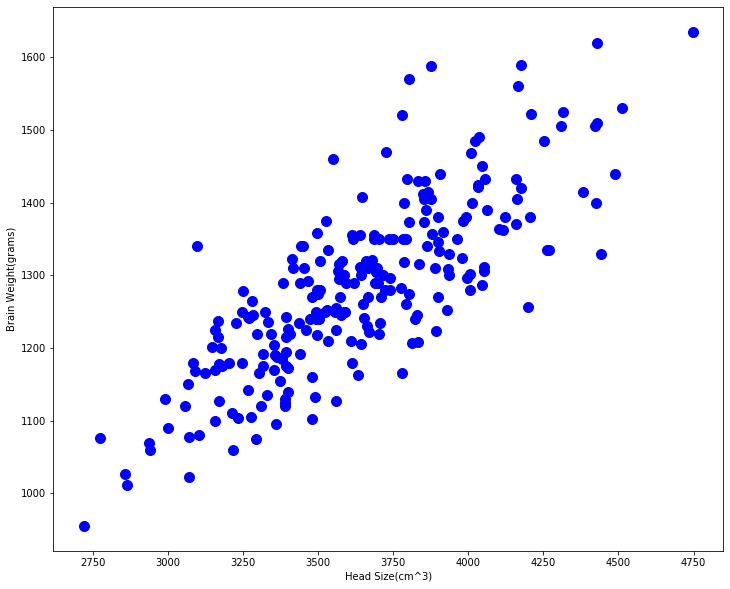

In [22]:
plt.figure(figsize=(12, 10))

plt.scatter(X[HEAD_SIZE], X[BRAIN_WEIGHT], s=100, color='blue')

plt.ylabel("Brain Weight(grams)")
plt.xlabel("Head Size(cm^3)")

plt.show()

### EllipticEnvelope
https://scikit-learn.org/stable/modules/generated/sklearn.covariance.EllipticEnvelope.html

In [46]:
from sklearn.covariance import EllipticEnvelope

ee = EllipticEnvelope(support_fraction=None, contamination=0.1)

In [49]:
y_pred = ee.fit_predict(X)

y_pred

array([-1,  1, -1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1, -1, -1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,
        1, -1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1, -1,  1,  1,  1,
       -1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,
       -1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1, -1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1, -1, -1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
       -1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
       -1,  1,  1,  1,  1

In [50]:
n_outliers = (y_pred == -1).sum()
n_outliers

24

### Ploting inliers and outliers
##### Decision boundary in black
##### Blue_data_points = Inliers
##### Red_data_points = Outliers

In [51]:
xx, yy = np.meshgrid(np.linspace(X[HEAD_SIZE].min(), X[HEAD_SIZE].max(), 500),
                     np.linspace(X[BRAIN_WEIGHT].min(), X[BRAIN_WEIGHT].max(), 500))

Z = ee.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

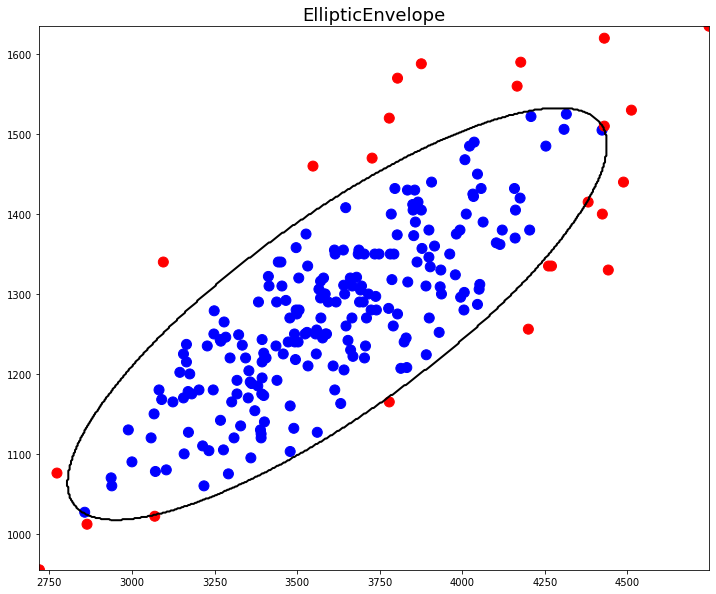

In [53]:
plt.figure(figsize=(12, 10))

plt.title('EllipticEnvelope', size=18)

colors = np.array(['r', 'b'])

plt.scatter(X[HEAD_SIZE], 
            X[BRAIN_WEIGHT], 
            s=100, 
            color=colors[(y_pred + 1) // 2])

plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='black')

plt.show()

### IsolationForest
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.IsolationForest.html

In [54]:
from sklearn.ensemble import IsolationForest

isf =  IsolationForest(behaviour='new', contamination=0.08)

In [55]:
y_pred = isf.fit_predict(X)

y_pred

array([-1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1, -1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
       -1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
       -1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1, -1,  1,  1, -1, -1,  1,  1,  1,  1,  1,  1,  1,
       -1,  1,  1,  1,  1

In [56]:
n_outliers = (y_pred == -1).sum()
n_outliers

19

### Ploting inliers and outliers
##### Decision boundary in black

In [57]:
xx, yy = np.meshgrid(np.linspace(X[HEAD_SIZE].min(), X[HEAD_SIZE].max(), 500),
                     np.linspace(X[BRAIN_WEIGHT].min(), X[BRAIN_WEIGHT].max(), 500))

Z = isf.predict(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)

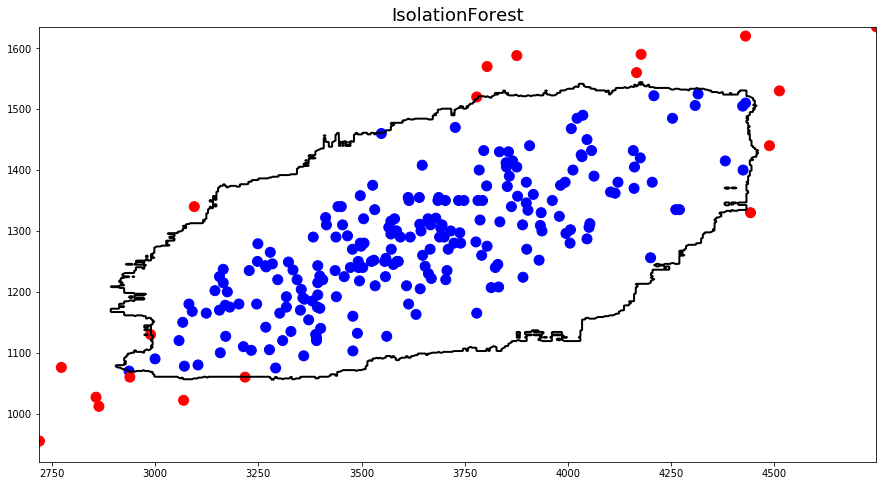

In [58]:
plt.figure(figsize=(15, 8))

plt.title('IsolationForest', size=18)

plt.scatter(X[HEAD_SIZE], 
            X[BRAIN_WEIGHT], 
            s=100, 
            color=colors[(y_pred + 1) // 2])


plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='black')

plt.show()

### LocalOutlierFactor
https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.LocalOutlierFactor.html

In [59]:
from sklearn.neighbors import LocalOutlierFactor

lof = LocalOutlierFactor(n_neighbors=15, contamination='auto')

In [60]:
y_pred = lof.fit_predict(X)

y_pred

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1, -1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
       -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1, -1, -1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
       -1,  1,  1,  1,  1

In [61]:
n_outliers = (y_pred == -1).sum()
n_outliers

12

### Ploting inliers and outliers

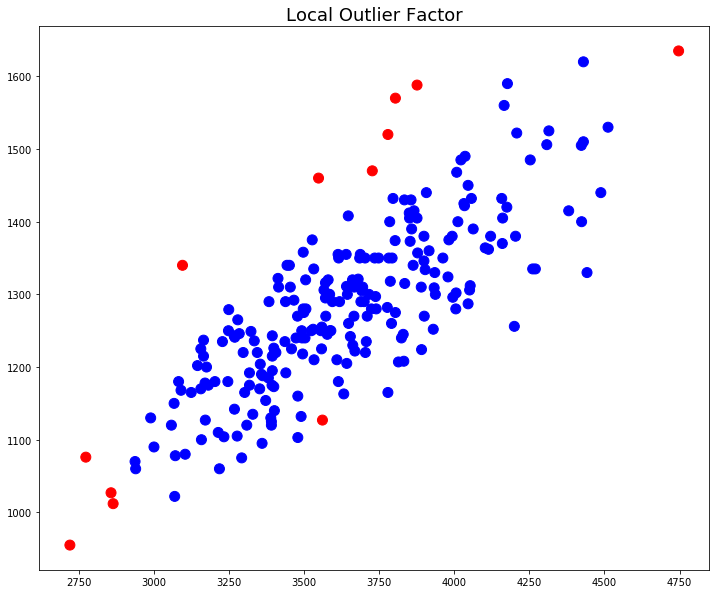

In [62]:
plt.figure(figsize=(12, 10))

plt.title('Local Outlier Factor', size=18)

plt.scatter(X[HEAD_SIZE], 
            X[BRAIN_WEIGHT], 
            s=100, 
            color=colors[(y_pred + 1) // 2])

plt.show()

In [63]:
X_scores = lof.negative_outlier_factor_
X_scores[0:10]

array([-1.32656456, -1.01072182, -1.11625177, -1.06464106, -1.31187691,
       -0.98778784, -1.03806996, -0.97987273, -1.10204192, -0.98907949])

##### Circles with radius proportional to the outlier scores

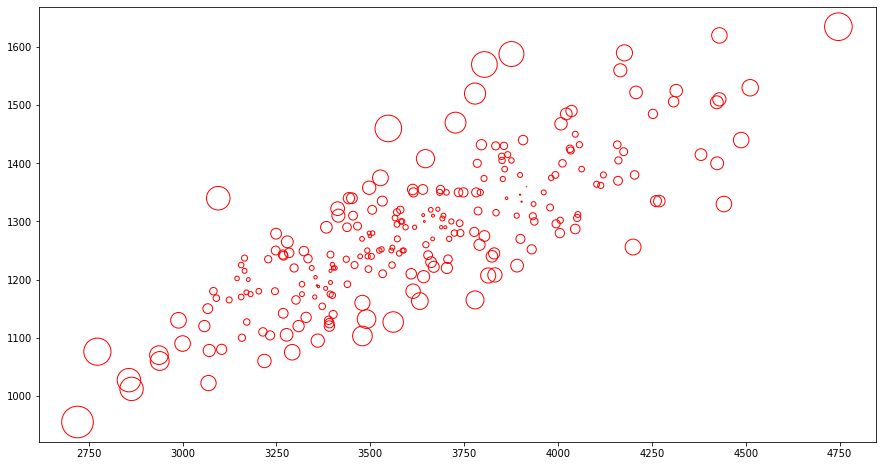

In [64]:
plt.figure(figsize=(15, 8))

radius = (X_scores.max() - X_scores) / (X_scores.max() - X_scores.min())

plt.scatter(X[HEAD_SIZE], 
            X[BRAIN_WEIGHT], 
            s=1000 * radius, edgecolors='r',
            facecolors='none', 
            label='Outlier scores')

plt.show()